- KEYWORDS: mass transfer


<h1>Mass transfer in porous catalysts (Ch 12 in Fogler)</h1>

![img](//img-9gag-fun.9cache.com/photo/287396_700b.jpg)
**Mass transfer**

# Mass transfer effects in reaction engineering

-   In this section we consider the effects of mass transfer, e.g. diffusion, on reactor design
-   The general strategy is to derive a correction factor that simply modifies the rate law
-   This enables us to use the same design equations

## Internal effectiveness factors

-   When porous catalyst pellets are used, reactants must diffuse into the pellet to react, and then products must diffuse out of pellet to exit the reactor.

![img](https://raw.githubusercontent.com/jkitchin/s17-06364/master/lectures/images/porous-particle.png)

-   If there is resistance to diffusion, e.g. the pellets are large, or with small pores, then we must consider this effect on the reactivity of the pellet
-   the effective diffusion coefficient is defined as:

$$D_e = \frac{D_{AB} \phi_p \sigma_c}{\tau}$$

-   where $D_{AB}$ is the normal gas phase diffusivity
-   &phi;\_p is the pellet porosity (void volume / total volume)
-   &sigma;\_c is the constriction factor, which is ratio of the smallest radius in the pores to the largest radius
-   &tau; is the tortuosity factor, which is the actual distance traveled by a molecule in the particle divided by the shortest distance it could have traveled.
-   all of these factors tend to make $D_e$ smaller than $D_{AB}$

-   When there are diffusion limits, the concentration inside the pellet is not the same as the concentration outside the pellet because there are reactions occuring inside the pellet

![img](https://raw.githubusercontent.com/jkitchin/s17-06364/master/lectures/images/concentration-profiles-porous-particle.png)

-   The concentration can be similar to the outside concentration if the reaction rate is slow and there is no diffusion limit
-   It may be smaller, or practically zero inside the pellet if the rate of reaction is very fast compared to diffusion
-   We would like to calculate the effective rate inside the particle, because then we could determine its effect on reactor design
-   Since the effective rate will be less than the ideal rate, the result is we will need larger reactors because the particles are not effectively used
    -   We will see later it is sometimes possible to design better particles
-   To quantitatively determine the significance, we consider a mole balance on a spherical particle.

![img](https://raw.githubusercontent.com/jkitchin/s17-06364/master/lectures/images/mole-balance-differential-sphere.png)

-   Let $W_{A}$ be the molar flux of $A$
-   We have at $r$ the rate of $A$ into the shell as $W_{A,r} 4 \pi r^2 |_r$
-   We have the rate of generation of $A$ in the shell as $r_A' \rho_c 4 \pi r_m^2 \Delta r $
-   In the limit of $\Delta r \rightarrow 0$ and at steady state we have
    $\frac{dW_{A,r} r^2}{dr} - r_A' \rho_c r^2 = 0$
-   For dilute concentrations (typical of gas phase reactions)
    -   $W_{A,r} = - D_e \frac{dC_A}{dr}$
-   Let us assume the rate law is simple, e.g. $r_A = k_n C_A^n$
-   This leads to

$ \frac{d^2C_A}{dr^2} + \frac{2}{r}\frac{dC_A}{dr} - \frac{k_n}{D_e}C_A^n   $

-   You can see that reaction and diffusion are coupled
-   The rate of diffusion is driven by gradients in concentration
-   The rate of reaction is driven by concentration
-   This is *not* an ordinary differential equation!
-   We have boundary conditions
    -   $C_A = C_{A,s}$ at $r=R$
    -   $\frac{dC_A}{dr} = 0$ at $r=0$
    -   This is a second order boundary value problem
-   To solve the problem, we convert it to a system of first order differential equations
-   Let $W_A = \frac{dC_A}{dr}$
    -   then $ \frac{dW_A}{dr} = \frac{d^2C_A}{dr^2}  $

Finally, we have these two coupled equations:

\begin{align}
\frac{dW_A}{dr} + \frac{2}{r}W_A - \frac{k_n}{De}C_A^n\\
\frac{dC_A}{dr} = W_A
\end{align}

With these new conditions: $C_A(R) = C_{A,s}$ and $\frac{dC_A}{dr}|_{r=0}=0$

-   If we solve these equations,  we will have a function that tells us the concentration of $A$ inside the particle.
    -   Then we can integrate the reaction rate throughout the particle to determine the *effective* rate (which will be less than the rate if the concentration is uniform throughout the particle)
    -   The overall rate is $ \int_0^R k_n C_A^n 4 \pi r^2 dr $
    -   The ideal rate is $ \int_0^R k_n C_{A,s}^n 4 \pi r^2 dr $
    -   We define the effectiveness factor $\eta = \frac{{overall rate}}{{ideal rate}}$
    -   Finally, in a mole balance, we replace the ideal rate with the effective rate: $r_{eff} = \eta r$

### A worked example

Let us consider a particle with these properties"

-   $D_e = 0.1$ cm^2/s
-   $R = 0.5$ cm
-   $k = 6.4$ 1/s
-   $C_{A,s} = 0.2$ mol/L
-   Our goal is to determine the effectiveness factor.
-   Solution: This is a boundary value problem.
-   Here we solve the problem using the shooting method. We know the value of $W_A$ at $r=0$: it is 0 because there is no flux about the center of the sphere due to symmetry.
-   We do not know, however, what the concentration is at $r=0$. So, we guess what the value is, and then integrate the differential equations from $r=0$ to $r=R$, and see if $C_A(R) = C_{A,s}$.
-   If it does, we made a good guess. If it does not, we try a new guess for $C_A(r=0)$, and iterate until we find the answer. Here is code that implements this idea. You cannot see the iteration in this code because it is done by hand. Start with Ca0 = 0.05, and work down to a solution.

At r=0.5 Ca=0.20000148865171946
The effectiveness factor =  0.563011348314

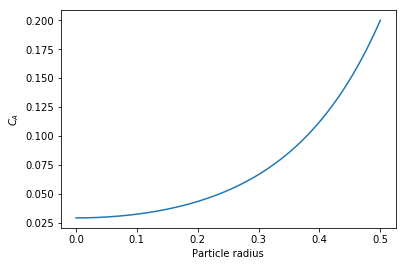

In [1]:
import numpy as np
from scipy.integrate import odeint

%matplotlib inline
import matplotlib.pyplot as plt

De = 0.1    # diffusivity cm^2/s
R = 0.5    # particle radius, cm
k = 6.4    # rate constant (1/s)
CAs = 0.2   # concentration of A at outer radius of particle (mol/L)


def ode(Y, r):
    Wa = Y[0]  # molar rate of delivery of A to surface of particle
    Ca = Y[1]  # concentration of A in the particle at r

    if r == 0:
        dWadr = 0   # this solves the singularity at r = 0
    else:
        dWadr = -2*Wa/r + k/De*Ca

    dCadr = Wa
    return [dWadr, dCadr]

# Initial conditions
Ca0 = 0.029315  # Ca(0) (mol/L) guessed to satisfy Ca(R) = CAs
                # It takes a lot of accuracy to get the solution
Wa0 = 0         # no flux at r=0 (mol/m^2/s)

rspan = np.linspace(0, R, 500)

Y = odeint(ode, [Wa0, Ca0], rspan)

Ca = Y[:, 1]

# here we check that Ca(R) = Cas
print('At r={0} Ca={1}'.format(rspan[-1], Ca[-1]))

plt.plot(rspan, Ca)
plt.xlabel('Particle radius')
plt.ylabel('$C_A$')

r = rspan
eta_numerical = (np.trapz(k * Ca * 4 * np.pi * (r**2), r)
                 / np.trapz(k * CAs * 4 * np.pi * (r**2), r))
print('The effectiveness factor = ', eta_numerical)

You can see from the graphical solution that the concentration inside the particle is much lower than outside the particle. As a result, the overall rate of the particle is only about 56% of the ideal rate. Consequently, you would need a larger weight of catalyst, or a larger reactor to achieve the same level of conversion as if there were no mass transfer limitations.

-   It is tedious to numerically solve for the effectiveness factor for each situation

-   Let us recast the equations in dimensionless form.

-   Let the characteristic length scale be defined by the volume to surface ratio: for a sphere this $a = R/3$

-   Now we define the dimensionless variables: $\overline{r} = r/a$ and $\overline{c} = C_A / C_{As}$.

-   This leads to the dimensionless differential equation:

$\frac{1}{\overline{r}^2}\frac{d}{d\overline{r}}  \left( \overline{r}^2 \frac{d\overline{c}}{d\overline{r}} \right) - \Phi^2 \overline{c}=0 $

or alternatively:
$ \frac{d^2\overline{c}}{d\overline{r}^2} = -\frac{2}{r}\frac{d\overline{c}}{d\overline{r}}  + \Phi^2 \overline{c}  $

with boundary conditions:
$\overline{c}(\overline{r}=3) = 1 $

$ \frac{d\overline{c}}{d\overline{r}} = 0 \textrm
{ at } \overline{r}=0   $

where we have defined $\Phi = \sqrt{\frac{k a^2}{D_A,}}$ which is known as the Thiele modulus, and it is a ratio of reaction rate to diffusion rate.

-   The point of this exercise is that an analytical solution to this problem exists:

$\overline{c}(\overline{r}) = \frac{3}{\overline{r}} \frac{\sinh \Phi \overline{r}}{\sinh 3 \Phi}  $

-   One can then analytically calculate the effectiveness factor as the actual rate of reaction in the particle divided by the ideal rate, to arrive at:

$ \eta = \frac{1}{\Phi}  \left [\frac{1}{\tanh 3 \Phi} - \frac{1}{3 \Phi} \right]$

-   This solution is plotted in two different ways below.

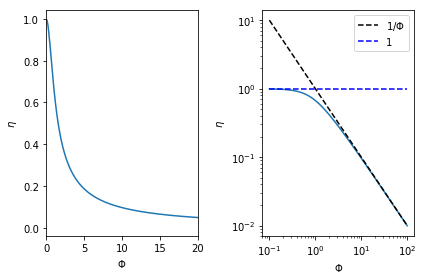

In [1]:
Phi = np.linspace(0, 100, 1000)
eta = 1.0 / Phi * (1.0 / np.tanh(3 * Phi) - 1.0 / (3 * Phi))

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(Phi, eta)
ax1.set_xlim([0, 20])
ax1.set_xlabel(r'$\Phi$')
ax1.set_ylabel(r'$\eta$')

ax2.loglog(Phi, eta)
ax2.loglog(Phi, 1.0 / Phi, 'k--', label=r'1/$\Phi$')
ax2.loglog(Phi, np.ones(shape=Phi.shape), 'b--', label='1')
ax2.set_xlabel(r'$\Phi$')
ax2.set_ylabel(r'$\eta$')
ax2.legend(loc='best')

plt.tight_layout()

-   The log-log plot is the more useful way to see the behavior.

-   For $\Phi \ll 1$ the effectiveness factor is practically one. That means the diffusion rate is much faster than reaction, so the concentration in the pellet is practically uniform and equal to the surface concentration.

-   For $\Phi \gg 1$ then $\eta \approx 1 \Phi$. Near $\Phi = 1$ you may want to evaluate the actual solution.

# Summary

-   Mass transfer reduces the effectiveness of a catalyst by reducing the concentration of reactants in the pores
-   We estimate the *effective* rate by integrating over the volume
-   This allows us to use mole balance framework to still do reactor design
-   We can quickly estimate the effectiveness factor by knowing the Thiele modulus (&Phi;)